In [1]:
import os
import time

import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage

from dnn_app_utils_v2 import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

In [29]:
# 載入訓練好的權重
parameters_filePath = os.path.join("car_vehicle_automobile_truck_van_lorry", "dataset", "dataset64_9_Layers.npy")
parameters = np.load(parameters_filePath).item()

In [30]:
# 測試
parameters.keys()

dict_keys(['W9', 'W5', 'W2', 'b3', 'W7', 'b4', 'b5', 'W1', 'b8', 'b2', 'W4', 'b9', 'W3', 'W6', 'b6', 'b1', 'W8', 'b7'])

In [31]:
# 測試
parameters['W1']

array([[ 0.00321461,  0.0078231 ,  0.01193012, ...,  0.00829913,
         0.01392157,  0.00390044],
       [-0.01455237, -0.00054427,  0.00579986, ..., -0.01188566,
        -0.01023521, -0.0009841 ],
       [-0.00918703, -0.00940686,  0.00208687, ...,  0.01459503,
         0.00026528, -0.0030395 ],
       ..., 
       [ 0.01212971,  0.00972449,  0.00472343, ...,  0.00828183,
         0.02122082,  0.00857639],
       [ 0.00073555, -0.01136752, -0.00796406, ..., -0.01892243,
         0.02039983, -0.00711672],
       [-0.01691202, -0.0023666 , -0.00456207, ..., -0.01813815,
        -0.01491239,  0.00895329]])

[[ 0.05552565]]
Accuracy: 0.0
[[ 0.]]
y = 0.0


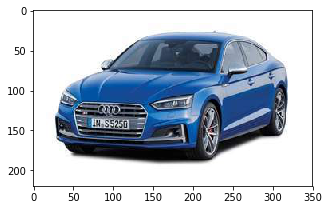

In [49]:
my_image = "car011.jpg" # change this to the name of your image file 
my_label_y = [1] # the true class of your image (1 -> car, 0 -> non-car)
num_px = 64

test_filePath = os.path.join("car_vehicle_automobile_truck_van_lorry", "test_dnn_images", my_image)
if os.path.isfile(test_filePath):
    image = np.array(ndimage.imread(test_filePath, flatten=False))
    my_image = scipy.misc.imresize(image, size=(num_px,num_px)).reshape((num_px*num_px*3,1))
    my_image = my_image/255.
    my_predicted_image = predict(my_image, my_label_y, parameters)
    print(my_predicted_image)
    plt.imshow(image)
    print ("y = " + str(np.squeeze(my_predicted_image)) )
else:
    print("找不到 {} 檔案！！".format(my_image))